# ANN for make simulation and make prediction in physics

# import working liberary

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.optimizers import RMSprop
from keras.models import load_model
import numpy as np


# test GPU

# global variables

In [2]:
# input variable to program
#inputFile = 'datasets/collect data_pi-modified.xlsx'
inputFile = 'collect data_pi-modified.xlsx'
inputSheetName = 'main'
outputFile = 'out_in3.xlsx'
outputSheetName = 'predicat_in3'
nameFigImg = 'fig_in3.png'


# read data

In [3]:
""" from openpyxl import Workbook
import openpyxl """
# Read the data from the excel file
data = pd.read_excel(inputFile,sheet_name=inputSheetName)
#data = data[data['N part']==337]
# Split the data into input and output variables
#X = data.drop('sqrt', axis=1) #static input for each case : extra dat2 of fiting
err1=data['err1'].to_frame('err1')
err2=data['err2'].to_frame('err2')
X = data.drop('Spectrum', axis=1)
X = X.drop('err1', axis=1)
X = X.drop('err2', axis=1)
#X = data['Pt']
y = data['Spectrum'].to_frame('Spectrum')
#y = pd.Series(y)
#y = y.to_frame('Spectrum')
print(data.head)

<bound method NDFrame.head of          s  N part     Pt  Spectrum     err1     err2
0      7.7     337  0.275  114.8980  0.21538  7.89015
1      7.7     337  0.325   83.9507  0.17051  5.61535
2      7.7     337  0.375   62.4481  0.13799  4.10800
3      7.7     337  0.425   46.3708  0.11247  3.01883
4      7.7     337  0.475   34.7823  0.09267  2.24990
...    ...     ...    ...       ...      ...      ...
1147  39.0      14  1.550    0.0139  0.00013  0.00139
1148  39.0      14  1.650    0.0092  0.00010  0.00092
1149  39.0      14  1.750    0.0062  0.00008  0.00062
1150  39.0      14  1.850    0.0043  0.00006  0.00043
1151  39.0      14  1.950    0.0029  0.00005  0.00029

[1152 rows x 6 columns]>


# normaliz input

In [4]:
# Normalize the input
from sklearn.preprocessing import RobustScaler
# Create a RobustScaler object
scaler = RobustScaler()
# Fit the scaler to the input data and transform it
X_normalized = scaler.fit_transform(X)
# Print the normalized input data
print('X_normalized')
print(X_normalized)
X_train = X_normalized
print('X_train')
print(X_train) 


X_normalized
[[-0.76774194  1.22702703 -0.54545455]
 [-0.76774194  1.22702703 -0.48484848]
 [-0.76774194  1.22702703 -0.42424242]
 ...
 [ 1.2516129  -0.51891892  1.24242424]
 [ 1.2516129  -0.51891892  1.36363636]
 [ 1.2516129  -0.51891892  1.48484848]]
X_train
[[-0.76774194  1.22702703 -0.54545455]
 [-0.76774194  1.22702703 -0.48484848]
 [-0.76774194  1.22702703 -0.42424242]
 ...
 [ 1.2516129  -0.51891892  1.24242424]
 [ 1.2516129  -0.51891892  1.36363636]
 [ 1.2516129  -0.51891892  1.48484848]]


# loada saved model

In [5]:

# Load the saved model
model = load_model('NegPion_3_test-17-5-2023-10-6L-out-noactivation-another-tofit-graph-100epoch.h5')

# define the model

In [6]:
""" 
# Define the model
model = Sequential()
# Add the first dense layer
model.add(Dense(30, input_dim=3, activation='relu'))
# Add batch normalization
#model.add(BatchNormalization())
model.add(Dense(30, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dense(60, activation='relu'))
#model.add(Dense(120, activation='relu'))
#model.add(Dense(120, activation='relu'))
#model.add(Dense(60, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
# Add batch normalization
#model.add(BatchNormalization())
# Add the output layer
model.add(Dense(1))
# Add the output layer
#model.add(Dense(1, activation='softmax')) """


" \n# Define the model\nmodel = Sequential()\n# Add the first dense layer\nmodel.add(Dense(30, input_dim=3, activation='relu'))\n# Add batch normalization\n#model.add(BatchNormalization())\nmodel.add(Dense(30, activation='relu'))\n#model.add(BatchNormalization())\n#model.add(Dense(60, activation='relu'))\n#model.add(Dense(120, activation='relu'))\n#model.add(Dense(120, activation='relu'))\n#model.add(Dense(60, activation='relu'))\nmodel.add(Dense(30, activation='relu'))\nmodel.add(Dense(30, activation='relu'))\n# Add batch normalization\n#model.add(BatchNormalization())\n# Add the output layer\nmodel.add(Dense(1))\n# Add the output layer\n#model.add(Dense(1, activation='softmax')) "

# compile the model

In [7]:
# Compile the model with Levenberg-Marquardt optimizer
""" optimizer = RMSprop(learning_rate=0.001, rho=0.001,)
model.compile(loss='mean_squared_error', optimizer=optimizer) """
#model.compile(loss='mse', optimizer='adam')
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

" optimizer = RMSprop(learning_rate=0.001, rho=0.001,)\nmodel.compile(loss='mean_squared_error', optimizer=optimizer) "

# train the model

In [8]:
# Train the model
#model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)

""" model.fit(X_train, y, epochs=100, batch_size=16) """


' model.fit(X_train, y, epochs=100, batch_size=16) '

# Evaluate the model and make prediction 

In [9]:
from sklearn.metrics import mean_squared_error

# Make predictions on new data
X_test = scaler.transform(X)
print("new_data is : ")
print(X_test)
predictions = model.predict(X_test)
predictions = predictions.flatten()
predictions = pd.Series(predictions)
predictions = predictions.to_frame('predictions')
print("predictions is : ")
print(predictions)

# Evaluate the model
score = model.evaluate(X_test, y)
print("score " , score)
print(score)
mse = mean_squared_error(y,predictions)
print('mse' , mse)

#print("accuracy")
#print(accuracy)

new_data is : 
[[-0.76774194  1.22702703 -0.54545455]
 [-0.76774194  1.22702703 -0.48484848]
 [-0.76774194  1.22702703 -0.42424242]
 ...
 [ 1.2516129  -0.51891892  1.24242424]
 [ 1.2516129  -0.51891892  1.36363636]
 [ 1.2516129  -0.51891892  1.48484848]]
36/36 [==============================] - 0s 643us/step
predictions is : 
      predictions
0      109.636314
1       82.974823
2       60.444534
3       45.281433
4       34.361656
...           ...
1147    -0.258989
1148    -0.323241
1149    -0.389827
1150    -0.482334
1151    -0.584213

[1152 rows x 1 columns]
36/36 [==============================] - 0s 719us/step - loss: 12.6325
score  12.632473945617676
12.632473945617676
mse 12.632478236791577


# save current compiled model

In [10]:
# Save the model
""" model.save('NegPion_3_test-17-5-2023-10-6L-out-noactivation-another-tofit-graph.h5') """

" model.save('NegPion_3_test-17-5-2023-10-6L-out-noactivation-another-tofit-graph.h5') "

# draw 

shape of data (1152, 6)
shape of pred (1152, 1)
shape of datap (1152, 7)
shape of xap (1152, 7)
shape of xapf (26, 7)


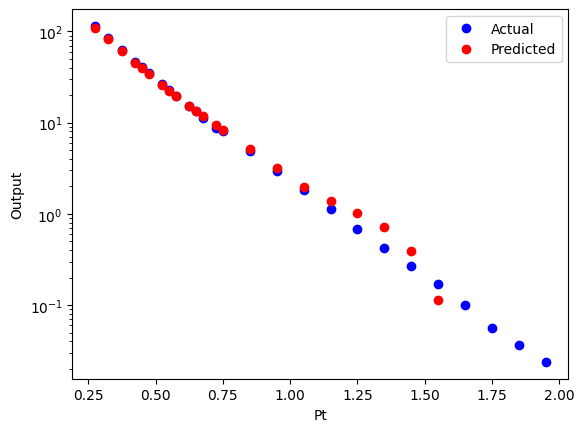

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


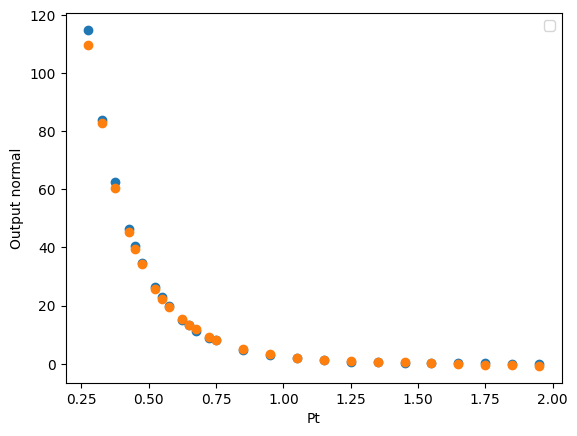

<Figure size 640x480 with 0 Axes>

In [11]:
# for drawing in 2d i choose Pt as x-axis
error = data['Spectrum'] - predictions['predictions']
error = error.to_frame('error')
print('shape of data' , data.shape)
print('shape of pred' , predictions.shape)
datap = pd.concat([data,predictions],axis=1)
print('shape of datap',datap.shape)

# xap : data
xap = pd.DataFrame(datap)
# xapf : xap after filteration
xapf= pd.DataFrame(datap)
xapf = xapf[xapf['s']==7.7]
xapf = xapf[xapf['N part']==337]
print('shape of xap',xap.shape)
print('shape of xapf',xapf.shape)

# Plot the data and predictions

plt.semilogy(xapf['Pt'], xapf['Spectrum']   ,'bo', label='Actual')
plt.semilogy(xapf['Pt'], xapf['predictions'],'ro', label='Predicted')
#plt.scatter(xapf['Pt'], xapf['Spectrum'])
#plt.scatter(xapf['Pt'], xapf['predictions'])
plt.xlabel('Pt')
plt.ylabel('Output')
plt.legend()
plt.show()
plt.savefig(nameFigImg)

# Plot the data and predictions

plt.scatter(xapf['Pt'], xapf['Spectrum'])
plt.scatter(xapf['Pt'], xapf['predictions'])
plt.xlabel('Pt')
plt.ylabel('Output normal')
plt.legend()
plt.show()
plt.savefig('fig_in3'+'-normal'+'.png')

# write output to excel 

In [12]:

# Write predictions , data to Excel file
outputpredicat = pd.DataFrame(datap)
# output is data frame
print(outputpredicat.head(10))
# Write the DataFrames to an Excel file with three sheets
with pd.ExcelWriter(outputFile) as writer:
    outputpredicat.to_excel(writer, sheet_name=outputSheetName, index=False)
    #output.to_excel(writer, sheet_name='output', index=False)


     s  N part     Pt  Spectrum     err1     err2  predictions
0  7.7     337  0.275  114.8980  0.21538  7.89015   109.636314
1  7.7     337  0.325   83.9507  0.17051  5.61535    82.974823
2  7.7     337  0.375   62.4481  0.13799  4.10800    60.444534
3  7.7     337  0.425   46.3708  0.11247  3.01883    45.281433
4  7.7     337  0.475   34.7823  0.09267  2.24990    34.361656
5  7.7     337  0.525   26.3221  0.07704  1.69598    25.767565
6  7.7     337  0.575   19.7093  0.06396  1.26704    19.523569
7  7.7     337  0.625   15.0548  0.05379  0.96702    15.277901
8  7.7     337  0.675   11.2735  0.04492  0.73605    11.851899
9  7.7     337  0.725    8.7656  0.03832  0.56201     9.324275


# print model summery 

In [13]:

print("End")
#print("accuracy :" + str(accuracy))
print("score " + str(score))
print(model.summary())

End
score 12.632473945617676
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 30)                120       
                                                                 
 dense_31 (Dense)            (None, 30)                930       
                                                                 
 dense_32 (Dense)            (None, 30)                930       
                                                                 
 dense_33 (Dense)            (None, 30)                930       
                                                                 
 dense_34 (Dense)            (None, 1)                 31        
                                                                 
Total params: 2941 (11.49 KB)
Trainable params: 2941 (11.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________